In [3]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pacharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pacharya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [6]:
def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text)  # Remove HTML tags
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabetic characters
    text = text.lower()  # Convert to lowercase
    
    # Apply lemmatization and remove stopwords
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

In [7]:
data = pd.read_csv('onlinekhabar_news.csv')

In [14]:
data[['original_title','translated_title','original_content','translated_content']]

,original_title,translated_title,original_content,translated_content
0,कालीमाटीमा काउली र साग सस्तियो,Cauliflower and greens became cheaper in Kalimati,"२२ कात्तिक, काठमाडौं । कालीमाटी होलसेल बजारमा ...","22 November, Kathmandu. Greens have become che..."
1,तोलामा ३ सय बढ्यो सुन,Gold increased by 300 per tola,"२१ कात्तिक, काठमाडौं । बुधबार सुनको भाउ तोलामा...","21 October, Kathmandu. On Wednesday, the price..."
2,कालीमाटीमा प्याज महँगियो,Onion became expensive in Kalimati,"२१ कात्तिक, काठमाडौं । कालीमाटी होलसेल बजारमा ...","21 October, Kathmandu. Onion prices have incre..."
3,तिहारपछि तोलामा २९०० घट्यो सुन,"After Tihar, gold fell by 2,900 per tola","२० कात्तिक, काठमाडौं । तिहारपछि सुनको भाउ तोला...","20 October, Kathmandu. After Tihar, the price ..."
4,"तिहारपछि कालीमाटीमा गोलभेँडा सस्तियो, यस्तो छ ...","After Tihar, mutton became cheaper in Kalimati...","२० कात्तिक, काठमाडौं । कालीमाटी होलसेल बजारमा ...","20 October, Kathmandu. In the Kalimati wholesa..."
...,...,...,...,...
935,"संसद् मात्रै होइन, जनतालाई पनि ढाँटे कुलमानले","Kulman deceived not only the Parliament, but a...","२५ साउन, काठमाडौं । नेपाल विद्युत् प्राधिकरणका...","25 July, Kathmandu. The Executive Director of ..."
936,अघिल्लै लेखा समितिले गरेको थियो कुलमानलाई अख्त...,"Earlier, the audit committee had decided that ...","२४ साउन, काठमाडौं । संसदको सार्वजनिक लेखा समित...","24 July, Kathmandu. It has been revealed that ..."
937,नमागेका कागज प्राधिकरणलाई नै फिर्ता गर्दै लेखा...,Audit committee returning unsolicited document...,"२५ साउन, काठमाडौं । प्रतिनिधिसभाको सार्वजनिक ल...","25 July, Kathmandu. The Public Accounts Commit..."
938,"लेखा समितिले माग्यो टीओडीको डेटा, प्राधिकरणले ...","Audit committee asked for TOD data, authority ...","२२ साउन, काठमाडौं । नेपाल विद्युत् प्राधिकरणले...","22 July, Kathmandu. The Nepal Electricity Auth..."


In [20]:
data['cleaned_content'] = data['translated_content'].apply(clean_text)
data['cleaned_content']

0      november kathmandu green become cheaper kalima...
1      october kathmandu wednesday price gold increas...
2      october kathmandu onion price increased kalima...
3      october kathmandu tihar price gold decreased p...
4      october kathmandu kalimati wholesale market la...
                             ...                        
935    july kathmandu executive director nepal electr...
936    july kathmandu revealed public account committ...
937    july kathmandu public account committee house ...
938    july kathmandu nepal electricity authority sen...
939    july kathmandu committee formed ministry finan...
Name: cleaned_content, Length: 940, dtype: object

In [16]:
data['cleaned_content'].reset_index()

,index,cleaned_content
0,0,november kathmandu green become cheaper kalima...
1,1,october kathmandu wednesday price gold increas...
2,2,october kathmandu onion price increased kalima...
3,3,october kathmandu tihar price gold decreased p...
4,4,october kathmandu kalimati wholesale market la...
...,...,...
935,935,july kathmandu executive director nepal electr...
936,936,july kathmandu revealed public account committ...
937,937,july kathmandu public account committee house ...
938,938,july kathmandu nepal electricity authority sen...


In [14]:
data['cleaned_content'][0]

'november kathmandu green become cheaper kalimati wholesale market past day rayo green maximum r per kg previous day today thursday dropped r tihar rupee traded palungo saag r per kg previous day today dropped r similarly local cauliflower also decreased cauli r previous day fallen r today kalimati price green cauliflower decreased supply increased according kalimati fruit vegetable market development committee onion priced r per kg according committee big mutton traded r small mutton maximum price r per kg red potato rupee per kg similarly dallo banta lamcho banta pea tane bodi ghee bean tate bean bitter bitter gourd maximum rupee chichindo ghiraunla become cheaper r per kg compared previous day chichindo ghiraunla per kg traded okra rupee barela esks rupee per kilo broccoli kanya mushroom dalle mushroom traded r per kg previous day price kurilo r per kg vegetable price kalimati market thursday'

In [22]:
x = data['cleaned_content']
y = data['sentiment_score']

In [23]:
pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=15000, min_df=5)),
        ('svm', SVC(kernel='linear'))
    ])

In [24]:
param_grid = {
        'tfidf__max_features': [10000, 15000, 20000],
        'tfidf__ngram_range': [ (1,1),(1,2)],
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf'] 
}

In [25]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [26]:
grid_search.fit(x, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\pacharya\AppData\Roaming\Python\Python313\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=15000,
                                                        min_df=5,
                                                        ngram_range=(1, 2))),
                                       ('svm', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf'],
                         'tfidf__max_features': [10000, 15000, 20000],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy', verbose=1)

In [27]:
cv_results = grid_search.cv_results_
mean_scores = cv_results['mean_test_score']

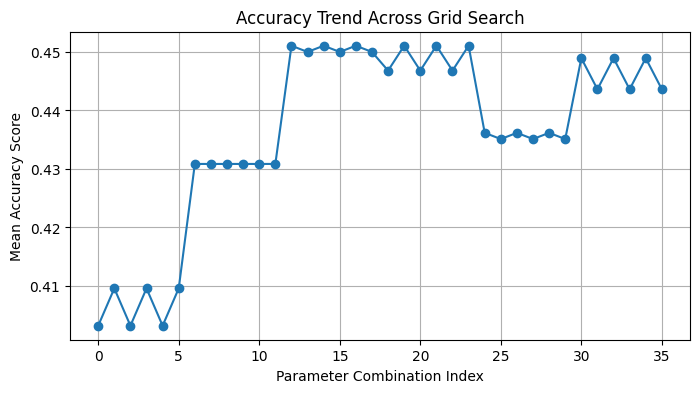

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(mean_scores, marker='o')
plt.title('Accuracy Trend Across Grid Search')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Accuracy Score')
plt.grid()
plt.show()

In [58]:
best_model = grid_search.best_estimator_

In [96]:
tfidf = grid_search.best_estimator_.named_steps['tfidf']
svm = grid_search.best_estimator_.named_steps['svm']
feature_names = tfidf.get_feature_names_out()

In [97]:
coefficients = svm.coef_.toarray()
coefficients

array([[-0.01238693, -0.1180208 , -0.17740664, ...,  0.        ,
        -0.00576872, -0.02241076],
       [-0.01062777, -0.16515424, -0.09258336, ..., -0.45569331,
        -0.0215968 ,  0.        ],
       [-0.18825003,  0.01956444,  0.27021017, ..., -0.85825565,
         0.04122762,  0.09015864]])

Class: Negative
Top positive features: ['district', 'price', 'provider', 'road', 'hacker', 'per', 'department', 'due', 'police', 'problem']
Top negative features: ['india', 'film', 'world', 'phone', 'also', 'congress', 'country', 'market', 'new', 'instagram']


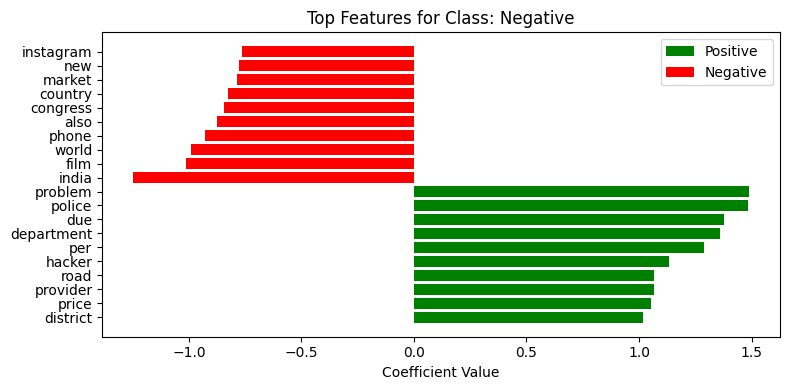

Class: Neutral
Top positive features: ['petrol', 'expensive', 'arrested', 'monday', 'problem', 'account', 'police', 'due', 'billion', 'decreased']
Top negative features: ['increased', 'record', 'cheaper', 'new', 'earlier', 'convention', 'technology', 'feature', 'flower', 'film']


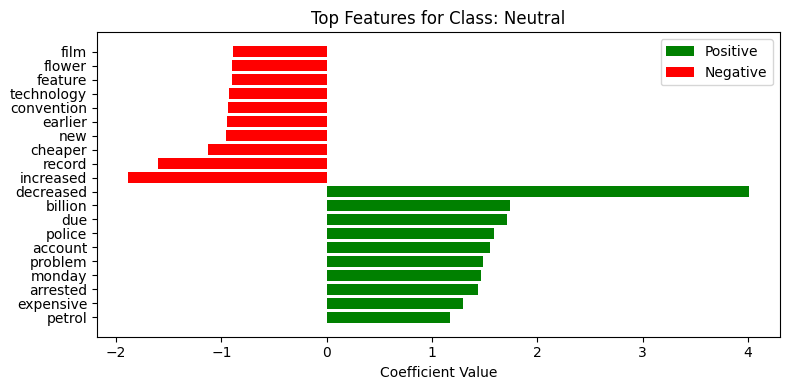

Class: Positive
Top positive features: ['option', 'people', 'mayor', 'iphone', 'instagram', 'click', 'voting', 'amount', 'country', 'world']
Top negative features: ['festival', 'increased', 'year', 'project', 'dollar', 'thread', 'tiktok', 'zuckerberg', 'giri', 'nepal']


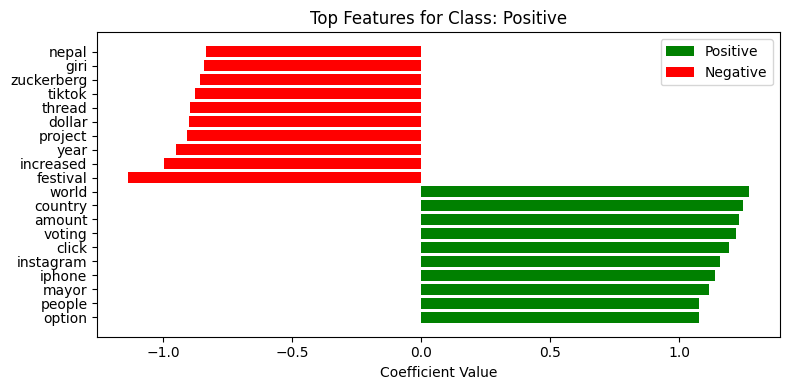

In [100]:
top_n = 10
for i, class_label in enumerate(['Negative', 'Neutral', 'Positive']):
    sorted_indices = coefficients[i].argsort()
    top_positive = sorted_indices[-top_n:]
    top_negative = sorted_indices[:top_n]
    
    print(f"Class: {class_label}")
    print("Top positive features:", [feature_names[j] for j in top_positive])
    print("Top negative features:", [feature_names[j] for j in top_negative])
    
    # Plot the top positive and negative features
    plt.figure(figsize=(8, 4))
    plt.barh([feature_names[j] for j in top_positive], coefficients[i][top_positive], color='green', label='Positive')
    plt.barh([feature_names[j] for j in top_negative], coefficients[i][top_negative], color='red', label='Negative')
    plt.xlabel('Coefficient Value')
    plt.title(f'Top Features for Class: {class_label}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [23]:
with open('svm_sentiment_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)

In [48]:
grid_search.best_params_

{'svm__C': 1,
 'svm__kernel': 'rbf',
 'tfidf__max_features': 10000,
 'tfidf__ngram_range': (1, 2)}

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
y_pred = best_model.predict(x_test)

In [61]:
y_pred

array([ 0, -1, -1,  0,  1,  1,  1,  0,  1,  1,  0,  1, -1,  0, -1,  1, -1,
        0,  0, -1,  0,  1, -1,  1, -1,  1, -1,  0,  1, -1, -1, -1,  0,  1,
       -1,  1,  1,  1, -1,  0,  1,  1, -1,  0,  1, -1, -1,  1,  0,  0,  0,
        1,  0,  0,  0, -1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  0,  1,  1,
       -1,  0,  1,  1, -1,  1,  0,  1, -1,  0,  0, -1,  1,  1, -1, -1,  1,
        0,  1,  1, -1,  0,  1,  1,  1,  1, -1,  1,  1,  0,  1, -1,  1,  1,
       -1, -1,  1,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1,  1,  1, -1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  0,  1,  1, -1,  1,  0,
        0, -1,  1, -1,  1, -1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  0,
       -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  0,  1, -1,  1, -1,  0,  0,
        1, -1,  1,  1, -1,  0,  1, -1, -1,  1,  1, -1,  0, -1, -1, -1,  1,
       -1])

Accuracy

In [62]:
accuracy_score(y_test, y_pred)

0.8670212765957447

Classification Report

In [63]:
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Classification Report: 
              precision    recall  f1-score   support

          -1       0.83      0.92      0.87        52
           0       0.93      0.77      0.84        52
           1       0.86      0.89      0.88        84

    accuracy                           0.87       188
   macro avg       0.87      0.86      0.86       188
weighted avg       0.87      0.87      0.87       188



In [90]:
report = classification_report(y_test, y_pred, output_dict=True)
report

{'-1': {'precision': 0.8275862068965517,
  'recall': 0.9230769230769231,
  'f1-score': 0.8727272727272727,
  'support': 52.0},
 '0': {'precision': 0.9302325581395349,
  'recall': 0.7692307692307693,
  'f1-score': 0.8421052631578947,
  'support': 52.0},
 '1': {'precision': 0.8620689655172413,
  'recall': 0.8928571428571429,
  'f1-score': 0.8771929824561403,
  'support': 84.0},
 'accuracy': 0.8670212765957447,
 'macro avg': {'precision': 0.8732959101844426,
  'recall': 0.8617216117216118,
  'f1-score': 0.8640085061137692,
  'support': 188.0},
 'weighted avg': {'precision': 0.8713849408793872,
  'recall': 0.8670212765957447,
  'f1-score': 0.8662526722997047,
  'support': 188.0}}

In [91]:
report_df = pd.DataFrame(report).transpose()

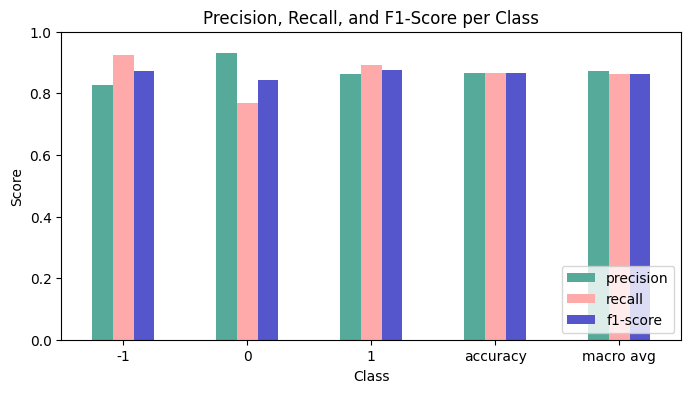

In [95]:
metrics = ['precision', 'recall', 'f1-score']
report_df[metrics].iloc[:-1].plot(kind='bar', figsize=(8, 4), color=['#5A9', '#FAA', '#55C'])
plt.title('Precision, Recall, and F1-Score per Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()


Confusion Matrix

In [80]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  2,  2],
       [ 2, 40, 10],
       [ 8,  1, 75]])

<Axes: >

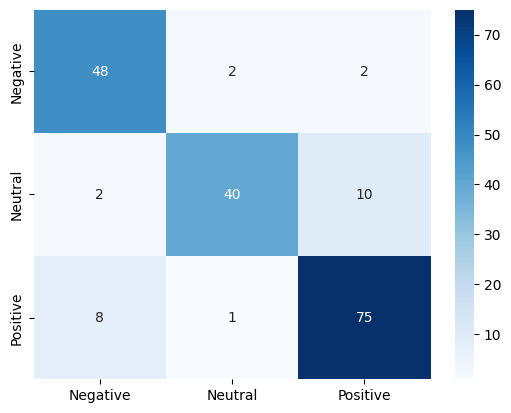

In [79]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])